###            - - - - - - - - - - - - - - - KNN ALGORITHM - - - - - - - -- - - - - - - -

#### - - - - - - - - - - - - - - - Importing Libraries - - - - - - - - - - - - - - - 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
mydata= pd.read_csv("C:\\Users\\josin\\OneDrive\\Desktop\\StudyMaterials\\M2I BIG DATA\machine_learning\\Social_Network_Ads.csv")

In [4]:
mydata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
mydata.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
mydata['Gender']= LabelEncoder().fit_transform(mydata['Gender'].astype(str))

In [8]:
mydata

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


#### 5. Affectation des variables d’entrée:


In [9]:
X = mydata.iloc[:, [1, 2,3]].values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

#### 6. Affectation de la variable de sortie :

In [10]:
Y = mydata.iloc[:, 4].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, 
random_state = 0)


#### 8. Nous allons utiliser Feature Scaling pour normaliser la data (Variable de même échelle) et améliorer la performance du modèle.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Transformer X_train
X_train = sc.fit_transform(X_train)
#Transformer X_test
X_test = sc.transform(X_test)


#### 9. Entraînement du modèle. Nous devons donc importer la bibliothèque scikit.neighbours et y importer le classificateur KNN.

#### 9. Training the model. We therefore need to import the scikit.neighbours library and import the KNN classifier into it.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### 10. Prédire les résultats de l'ensemble de test. Nous pouvons prédire les résultats de l'ensemble de test.

#### 10. Predicting the results of the test set. We can predict the results of the test set.

In [19]:

y_pred = classifier.predict(X_test)
#Displaying out the predicted values
print(y_pred)
#Maintenant, pour calculer la précision de notre modèle...
c=0
for i in range(0,len(y_pred)):
    if(y_pred[i]==y_test[i]):
        c=c+1
        accuracy=c/len(y_pred)
print("Accuracy is")
print(accuracy)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
Accuracy is
0.93


#### 11. Ainsi, lorsque vous exécutez ceci, vous obtenez une précision d'environ 76%, ce qui est un grand succès pour notre classificateur.Maintenant, la section suivante est la visualisation des données, qui nous aide à visualiser la précision et les erreurs de notre modèle.

#### 11. So when you run this, you get an accuracy of about 76%, which is a great success for our classifier.Now, the next section is the data visualization, which helps us visualize the accuracy and errors of our model.

In [20]:
#Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
matrice_conf=pd.DataFrame(cm,index=['positive','négative'],columns=['positive','negative'])

In [21]:
matrice_conf

,positive,negative
positive,64,4
négative,3,29


C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

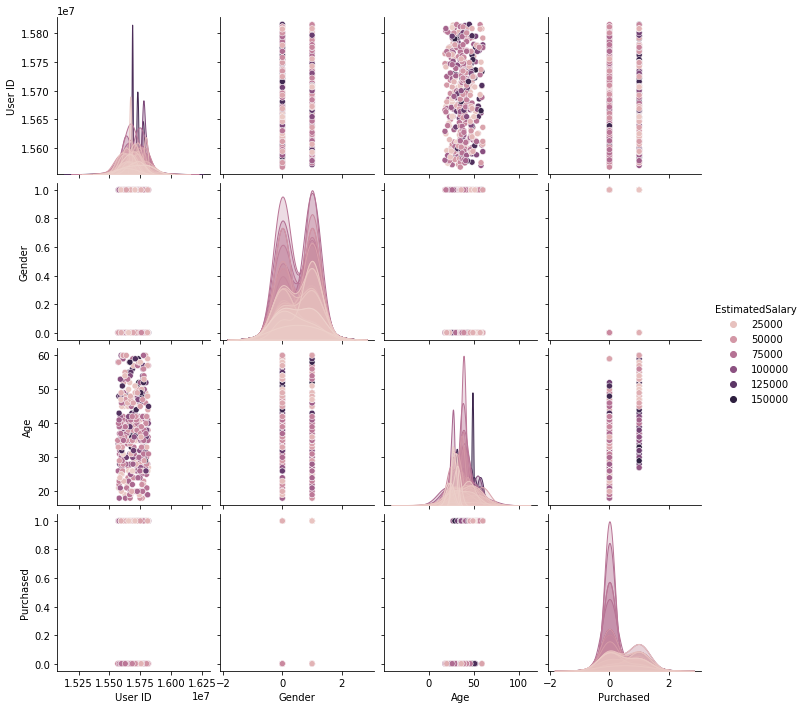

In [38]:
sns.pairplot(mydata,hue='EstimatedSalary')

In [23]:
from sklearn.model_selection import cross_val_score

In [26]:
knn_cv =KNeighborsClassifier(n_neighbors =3)
cv_scores = cross_val_score(knn_cv,X,Y,cv=5)
print(cv_scores)
print(f"cv_scores mean :{np.mean(cv_scores)}")

[0.8    0.9    0.75   0.7375 0.625 ]
cv_scores mean :0.7625


In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
knn2 =KNeighborsClassifier()
param_grid = {"n_neighbors":np.arange(1,25),"p":[1,2,3]}

In [33]:
knn_gscv =GridSearchCV(knn2,param_grid,cv=5)
knn_gscv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2, 3]})

In [34]:
knn_gscv.best_params_

{'n_neighbors': 1, 'p': 2}

In [35]:
knn_gscv.best_score_

0.78

In [36]:
knn_gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2, 3]})